### Linear Regression


Linear regression is a statistical method used in machine learning and statistics to model the relationship between a dependent variable (target) and one or more independent variables (features). The goal of linear regression is to find the linear relationship that best predicts the dependent variable based on the given independent variables.

In this section, assuming we intend to build a linear regression model to predict `price` independent variables. Therefore, the equation for such linear regression can be demonstrated as follows:

$ [price] = \beta_0 + \beta_1 \times [variable 1] + \beta_2 \times [variable 2] + \beta_3 \times [variable 3] ......$   

in which $\beta_i$ are coefficients in the linear model.

In [2]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd
from pandas.plotting import scatter_matrix
import seaborn as sns
import statsmodels.api as sm
from statsmodels.api import OLS
from scipy.stats import norm
from scipy import stats
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

## Analyzing Data

First, we will conduct a thorough data analysis to ensure that the data is clean, without any missing values or outliers. These issues can lead to various problems, including model failure or inaccurate predictions.

In [30]:
# Reading the file
df = pd.read_csv("/content/melb_data.csv")
df.head(5)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [31]:
# Describe functio0n here provides detail such as count, mean, min and max value of numeric data
df.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13580.000000,13518.000000,13580.000000,7130.000000,8205.000000,13580.000000,13580.000000,13580.000000
mean,2.937997,1.075684e+06,10.137776,3105.301915,2.914728,1.534242,1.610075,558.416127,151.967650,1964.684217,-37.809203,144.995216,7454.417378
std,0.955748,6.393107e+05,5.868725,90.676964,0.965921,0.691712,0.962634,3990.669241,541.014538,37.273762,0.079260,0.103916,4378.581772
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,2.000000,6.500000e+05,6.100000,3044.000000,2.000000,1.000000,1.000000,177.000000,93.000000,1940.000000,-37.856822,144.929600,4380.000000
50%,3.000000,9.030000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.802355,145.000100,6555.000000
75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,2.000000,651.000000,174.000000,1999.000000,-37.756400,145.058305,10331.000000
max,10.000000,9.000000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


In [32]:
# from above cell we can see for variable BuildingArea, Year Built and Landsize count is less than other variables\
# Lets check for null values
df.isna().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

In [34]:
# Drop the null or NaN values.
print("Shape of dataframe before dropping null values", df.shape)
df.dropna(inplace=True)
print("Shape of dataframe after dropping null values", df.shape)


Shape of dataframe before dropping null values (13580, 21)
Shape of dataframe after dropping null values (6196, 21)


In [35]:
df.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,6196.000000,6.196000e+03,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000
mean,2.931407,1.068828e+06,9.751097,3101.947708,2.902034,1.576340,1.573596,471.006940,141.568645,1964.081988,-37.807904,144.990201,7435.489509
std,0.971079,6.751564e+05,5.612065,86.421604,0.970055,0.711362,0.929947,897.449881,90.834824,38.105673,0.075850,0.099165,4337.698917
min,1.000000,1.310000e+05,0.000000,3000.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1196.000000,-38.164920,144.542370,389.000000
25%,2.000000,6.200000e+05,5.900000,3044.000000,2.000000,1.000000,1.000000,152.000000,91.000000,1940.000000,-37.855438,144.926198,4383.750000
50%,3.000000,8.800000e+05,9.000000,3081.000000,3.000000,1.000000,1.000000,373.000000,124.000000,1970.000000,-37.802250,144.995800,6567.000000
75%,4.000000,1.325000e+06,12.400000,3147.000000,3.000000,2.000000,2.000000,628.000000,170.000000,2000.000000,-37.758200,145.052700,10175.000000
max,8.000000,9.000000e+06,47.400000,3977.000000,9.000000,8.000000,10.000000,37000.000000,3112.000000,2018.000000,-37.457090,145.526350,21650.000000


From above description of data we can see that minimum value of landsize and buildingarea is 0 and minimum value for YearBuilt is 1196.

In [36]:
df[df['Landsize'] == 0].shape

(1015, 21)

In [37]:
df[df['BuildingArea'] == 0]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
4344,North Melbourne,19 Shands La,2,t,841000.0,S,Jellis,4/03/2017,2.3,3051.0,...,1.0,1.0,215.0,0.0,2000.0,Melbourne,-37.7953,144.9437,Northern Metropolitan,6821.0


We will delete rows where Landsize, BuildingArea is 0 and YearBuilt is 1196.

In [38]:
df.drop(df[df.Landsize == 0].index, inplace=True)
df.shape

(5181, 21)

In [39]:
df.drop(df[df.BuildingArea == 0].index, inplace=True)
df.shape

(5180, 21)

In [40]:
df.drop(df[df.YearBuilt == 1196].index, inplace=True)
df.shape

(5179, 21)

array([[<Axes: title={'center': 'Rooms'}>,
        <Axes: title={'center': 'Price'}>,
        <Axes: title={'center': 'Distance'}>,
        <Axes: title={'center': 'Postcode'}>],
       [<Axes: title={'center': 'Bedroom2'}>,
        <Axes: title={'center': 'Bathroom'}>,
        <Axes: title={'center': 'Car'}>,
        <Axes: title={'center': 'Landsize'}>],
       [<Axes: title={'center': 'BuildingArea'}>,
        <Axes: title={'center': 'YearBuilt'}>,
        <Axes: title={'center': 'Lattitude'}>,
        <Axes: title={'center': 'Longtitude'}>],
       [<Axes: title={'center': 'Propertycount'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

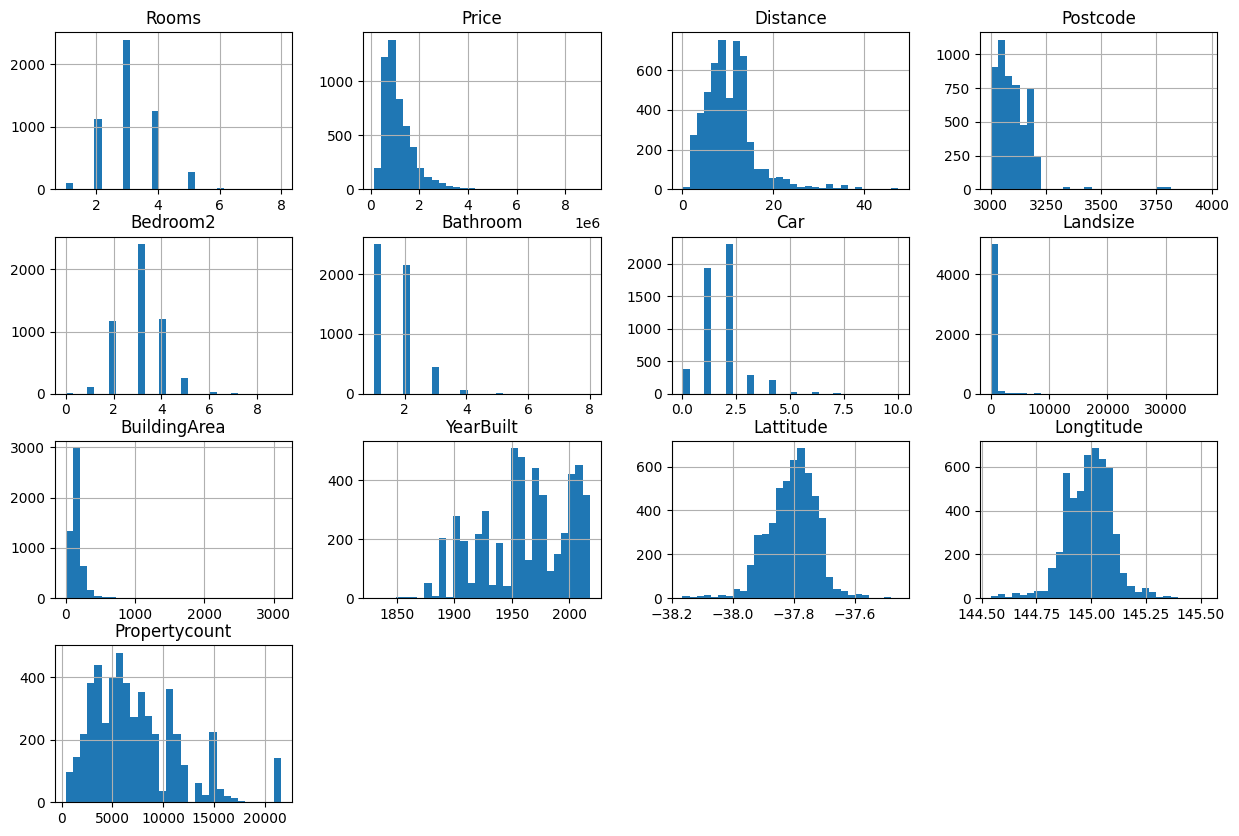

In [41]:
# Visualising the distribution of each numeric variable
df.hist(bins=30, figsize=(15, 10))

In [42]:
# We will drop some column
df.drop(['Propertycount','Bedroom2','Address', 'SellerG','Date','Suburb'], axis=1, inplace=True)

In [43]:
df.shape

(5179, 15)

## Correlation
A correlation map, often represented as a correlation matrix or heatmap, is a valuable tool in machine learning for several reasons:

**Feature Selection**:
Correlation maps help identify relationships between different features in a dataset. High correlation between two features may indicate redundancy, and one of them could potentially be removed to reduce dimensionality without losing much information. This can simplify the model and improve computational efficiency.

**Understanding Relationships**:
By visually inspecting the correlation matrix, you can gain insights into how different features are related to each other. This understanding is crucial for interpreting the impact of each feature on the target variable and refining feature engineering strategies.

**Collinearity Detection**:
High correlation between two features may indicate collinearity, which can adversely affect the performance of some machine learning algorithms. Collinearity can lead to unstable coefficient estimates and make it challenging for models to assign accurate weights to individual features.

**Model Performance Improvement**:
Removing highly correlated features can enhance the generalization capability of a model. Reducing multicollinearity can lead to more stable and interpretable models, especially in linear regression models.

<ipython-input-44-91ae4acf8beb>:4: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

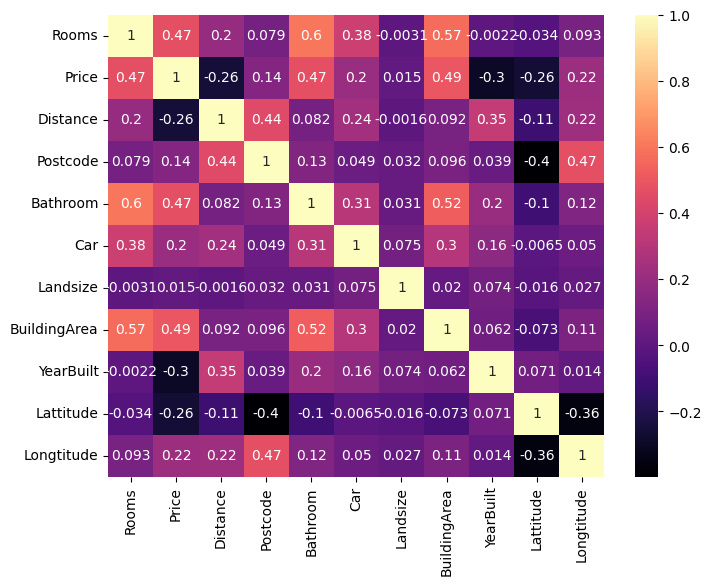

In [44]:
#Define size ofthe plot
plt.subplots(figsize=(8,6))
#Plot heatmap of correlation between columns
sns.heatmap(df.corr(), annot=True, cmap='magma')

In [45]:

lat = np.mean(df['Lattitude'])
lon = np.mean(df['Longtitude'])
fig = px.density_mapbox(df, lat='Lattitude', lon='Longtitude', z='Price', radius=2,
                        center=dict(lat = lat, lon = lon), zoom=10, mapbox_style="carto-positron")
fig.show()

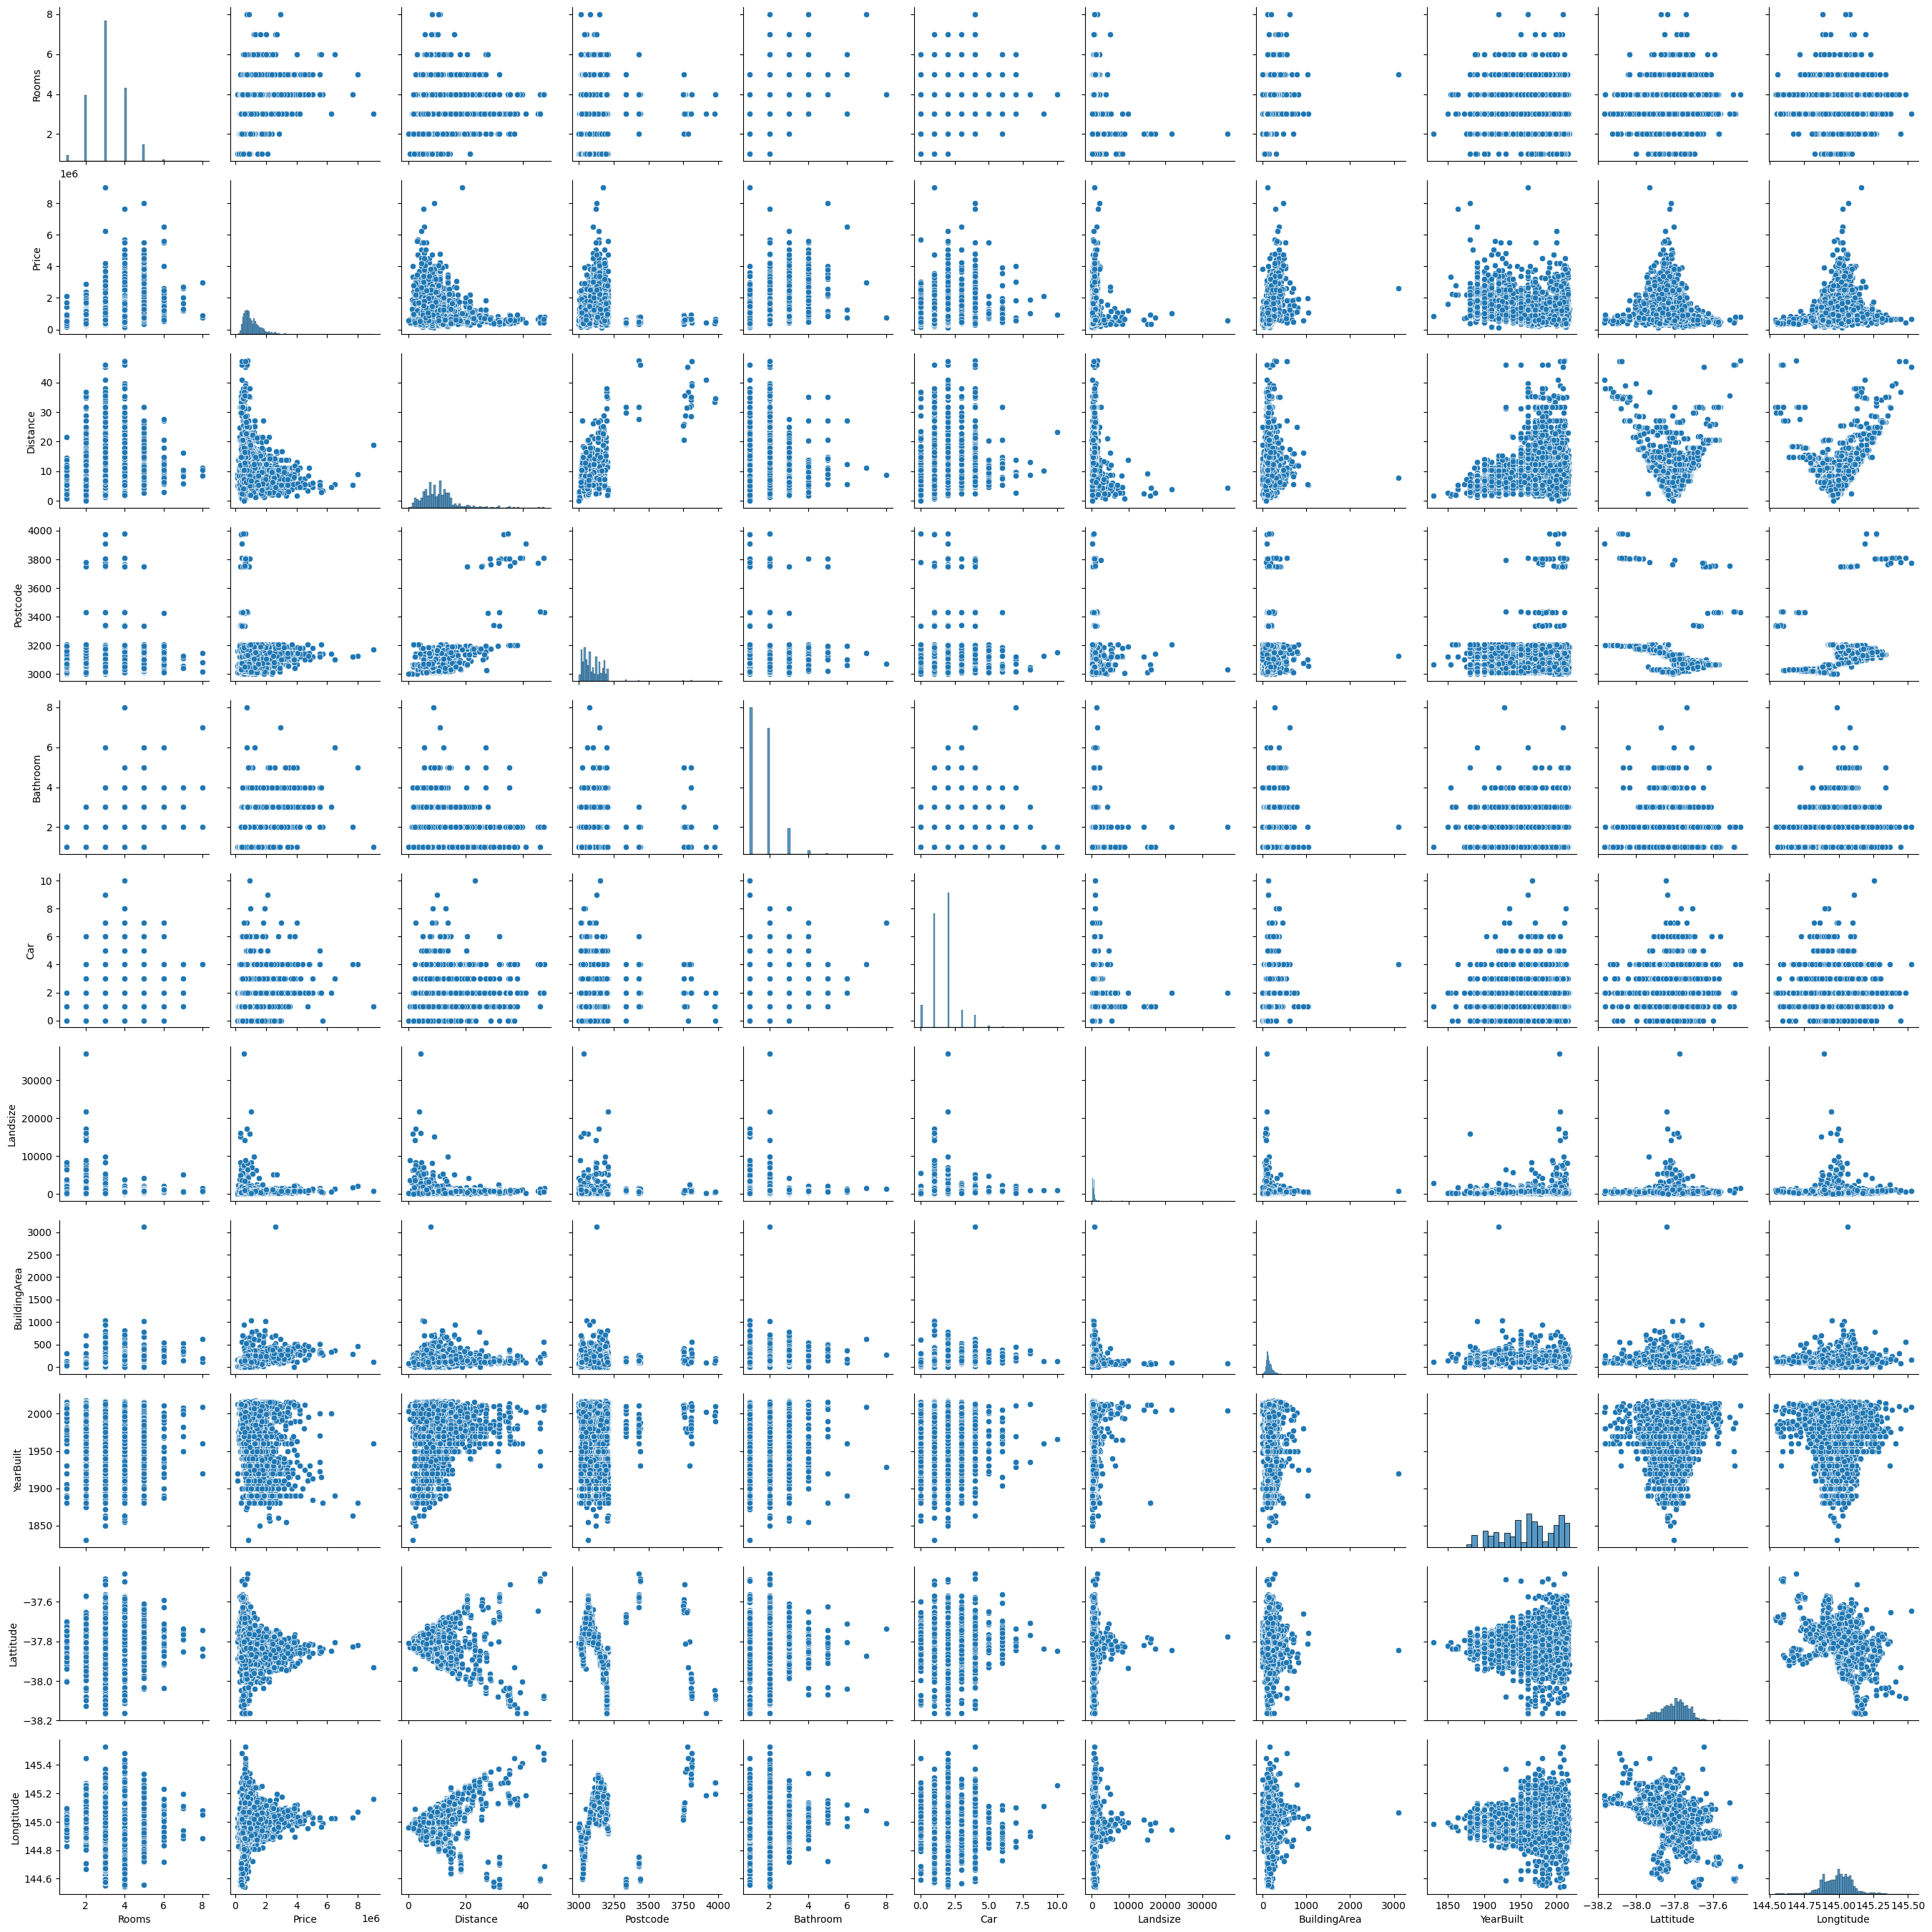

In [46]:
sns.pairplot(df)


##  One Hot Encoding
One-hot encoding is a technique used in machine learning to represent categorical variables as binary vectors. Categorical variables are variables that can take on a limited, and usually fixed, set of values or categories. One-hot encoding is applied to convert these categorical variables into a format that can be provided to machine learning algorithms to improve predictive performance.

In [47]:
# first convert categorical variables to dummy variables using one hot encoding
categorical_var = ['Type','Method','CouncilArea','Regionname']

# create dummy variables for all the other categorical variables
for variable in categorical_var:
#   create dummy variables for given columns
    dummies = pd.get_dummies(df[variable],prefix=variable)
    df = pd.concat([df,dummies],axis=1)
    df.drop([variable],axis=1,inplace=True)

df.head()

,Rooms,Price,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,...,CouncilArea_Yarra,CouncilArea_Yarra Ranges,Regionname_Eastern Metropolitan,Regionname_Eastern Victoria,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,Regionname_Western Victoria
1,2,1035000.0,2.5,3067.0,1.0,0.0,156.0,79.0,1900.0,-37.8079,...,1,0,0,0,1,0,0,0,0,0
2,3,1465000.0,2.5,3067.0,2.0,0.0,134.0,150.0,1900.0,-37.8093,...,1,0,0,0,1,0,0,0,0,0
4,4,1600000.0,2.5,3067.0,1.0,2.0,120.0,142.0,2014.0,-37.8072,...,1,0,0,0,1,0,0,0,0,0
6,3,1876000.0,2.5,3067.0,2.0,0.0,245.0,210.0,1910.0,-37.8024,...,1,0,0,0,1,0,0,0,0,0
7,2,1636000.0,2.5,3067.0,1.0,2.0,256.0,107.0,1890.0,-37.8060,...,1,0,0,0,1,0,0,0,0,0


In [48]:
df = df.reset_index(drop=True)
df.head()

,Rooms,Price,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,...,CouncilArea_Yarra,CouncilArea_Yarra Ranges,Regionname_Eastern Metropolitan,Regionname_Eastern Victoria,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,Regionname_Western Victoria
0,2,1035000.0,2.5,3067.0,1.0,0.0,156.0,79.0,1900.0,-37.8079,...,1,0,0,0,1,0,0,0,0,0
1,3,1465000.0,2.5,3067.0,2.0,0.0,134.0,150.0,1900.0,-37.8093,...,1,0,0,0,1,0,0,0,0,0
2,4,1600000.0,2.5,3067.0,1.0,2.0,120.0,142.0,2014.0,-37.8072,...,1,0,0,0,1,0,0,0,0,0
3,3,1876000.0,2.5,3067.0,2.0,0.0,245.0,210.0,1910.0,-37.8024,...,1,0,0,0,1,0,0,0,0,0
4,2,1636000.0,2.5,3067.0,1.0,2.0,256.0,107.0,1890.0,-37.8060,...,1,0,0,0,1,0,0,0,0,0


In [51]:
# Building the model
x = df.drop(['Price'], axis=1)
y = df['Price'].astype(float)

# split train and test dataset
train_x, test_x, train_y, test_y = train_test_split(x,y , test_size=0.3, random_state=42)

print("Training input variable size:", train_x.shape)
print("Training output variable size", train_y.shape)

print("Testing input variable size:", test_x.shape)
print("Testing output variable size:", test_y.shape)

Training input variable size: (3625, 57)
Training output variable size (3625,)
Training input variable size: (1554, 57)
Training input variable size: (1554,)


In [52]:
#Create an instance of linear model
lm = LinearRegression()
#Fit the model to data
model = lm.fit(train_x, train_y)
score = model.score(test_x,test_y)                                          #Get R2 for model

print('Score: ', score)

Score:  0.6212665900139646


In the context of a linear model, the term "score" generally refers to the predicted values produced by the model for a given set of input features. The score represents the model's estimation or prediction for the target variable based on the provided input data.

In [53]:
# Print predicted value against actual value
pred_y = lm.predict(test_x)
df_predicted = pd.DataFrame({'Actual': test_y, 'Predicted': np.round(pred_y,2)})
df_predicted.head(30)

,Actual,Predicted
584,2550000.0,2383643.70
1215,1115000.0,1020831.13
877,700000.0,730702.57
4230,685000.0,826299.21
4159,1300000.0,1535698.16
4545,705000.0,746974.92
2787,5500000.0,3072646.66
1744,2273000.0,2207308.50
4481,286000.0,375760.83
3801,850000.0,837273.64


## Re-evaluate Model
Now that we have identified from the correlation map that the number of bathrooms is moderately correlated with the number of rooms and the building area, let's construct a model after excluding the bathroom variable. We'll assess whether this exclusion contributes to an improvement in our score.

In [55]:
df.drop(['Bathroom'], axis=1, inplace=True)

In [56]:
# Building the model
x = df.drop(['Price'], axis=1)
y = df['Price'].astype(float)

# split train and test dataset
train_x, test_x, train_y, test_y = train_test_split(x,y , test_size=0.3, random_state=22)

print("Training input variable size:", train_x.shape)
print("Training output variable size", train_y.shape)

print("Training input variable size:", test_x.shape)
print("Training input variable size:", test_y.shape)

Training input variable size: (3625, 56)
Training output variable size (3625,)
Training input variable size: (1554, 56)
Training input variable size: (1554,)


In [57]:
#Create an instance of linear model
lm = LinearRegression()
#Fit the model to data
model = lm.fit(train_x, train_y)
score = model.score(test_x,test_y)

print('Score: ', score)

Score:  0.6566625858898502


In [58]:
# Print predicted value against actual value
pred_y = lm.predict(test_x)
df_pred = pd.DataFrame({'Actual': test_y, 'Predicted': np.round(pred_y,2)})
df_pred.head(30)

,Actual,Predicted
351,2435000.0,1701098.47
3477,1211000.0,1004506.62
718,1000000.0,1556573.85
2078,1126000.0,1520077.86
3856,845000.0,915294.91
1247,661000.0,637775.75
4403,676000.0,645208.44
3548,1190000.0,1071213.26
3545,550000.0,1202824.83
2368,784000.0,935665.41
